<a href="https://colab.research.google.com/github/salmanromeo/MAE_5020_Data_Driven_Aerospace_Engineering/blob/main/Homework_2_Shafi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1.   **a) Plot the average face of the first 36 individuals.**
1.   **b) Plot the eigenvalues.**



File downloaded to: sample_data/allFaces.mat


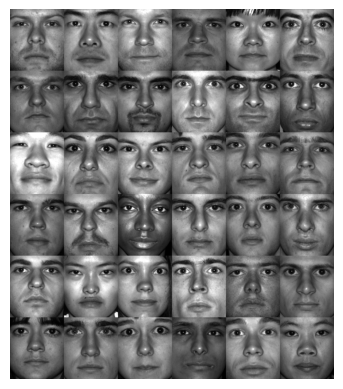

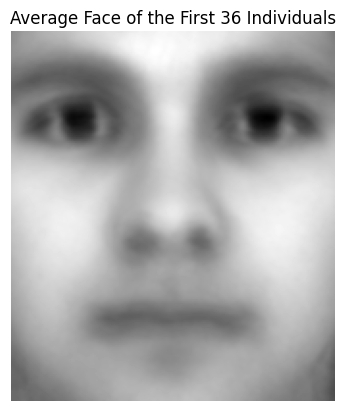

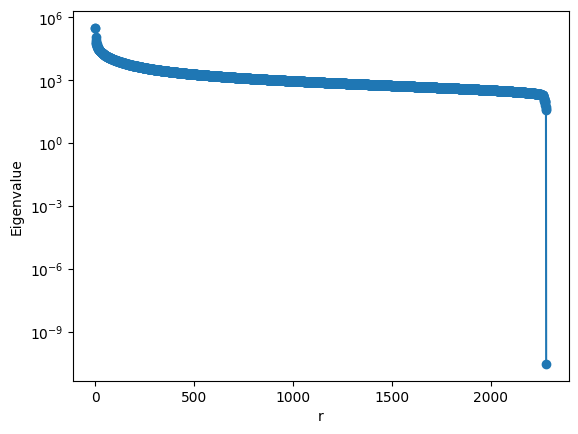

In [1]:
import os
import urllib.request
import shutil
import scipy.io
import matplotlib.pyplot as plt
import numpy as np

# Define the path to the folder and the filename
folder_path = 'sample_data'
filename = 'allFaces.mat'
file_path = os.path.join(folder_path, filename)

# Check if the folder exists, if not, create it
if not os.path.exists(folder_path):
    os.makedirs(folder_path)

# Check if the file exists in the specified folder
if not os.path.exists(file_path):
    # Download the file using urllib.request.urlretrieve
    file_url = "https://github.com/kursatkara/databook_python/raw/master/DATA/allFaces.mat"
    os.makedirs(folder_path, exist_ok=True)
    urllib.request.urlretrieve(file_url, file_path)
    print(f"File downloaded to: {file_path}")
else:
    print(f"{filename} file already exists in the {folder_path} folder.")

# Load the mat file from the specified folder
mat_contents = scipy.io.loadmat(file_path)

# Extract the necessary data
faces = mat_contents['faces']
m = int(np.squeeze(mat_contents['m']))
n = int(np.squeeze(mat_contents['n']))
nfaces = np.ndarray.flatten(mat_contents['nfaces'])

nfaces     = np.ndarray.flatten(mat_contents['nfaces'])
allPersons = np.zeros((n*6,m*6))
count      = 0

# Plot single image of each person
for j in range(6):
    for k in range(6):
        allPersons[j*n : (j+1)*n, k*m : (k+1)*m] = np.reshape(faces[:,np.sum(nfaces[:count])],(m,n)).T
        count += 1

img = plt.imshow(allPersons)
img.set_cmap('gray')
plt.axis('off')
plt.show()

# We use the first 36 people for training data
trainingFaces = faces[:, :np.sum(nfaces[:36])]

# Average of the training data
avgFace = np.mean(trainingFaces, axis=1)  # size n*m by 1

# Compute eigenfaces on mean-subtracted training data
X = trainingFaces - np.tile(avgFace, (trainingFaces.shape[1], 1)).T
U, S, VT = np.linalg.svd(X, full_matrices=0)

# Plot the average face of the first 36 individuals
plt.figure()
img_avg = np.reshape(avgFace, (m, n)).T
plt.imshow(img_avg, cmap='gray')
plt.title('Average Face of the First 36 Individuals')
plt.axis('off')
plt.show()

# Plot the eigenvalues
plt.figure()
plt.semilogy(S, marker='o')
plt.xlabel('r')
plt.ylabel('Eigenvalue')
plt.show()

1.   **c) Plot the first 36 eigenfaces from the U matrix.**



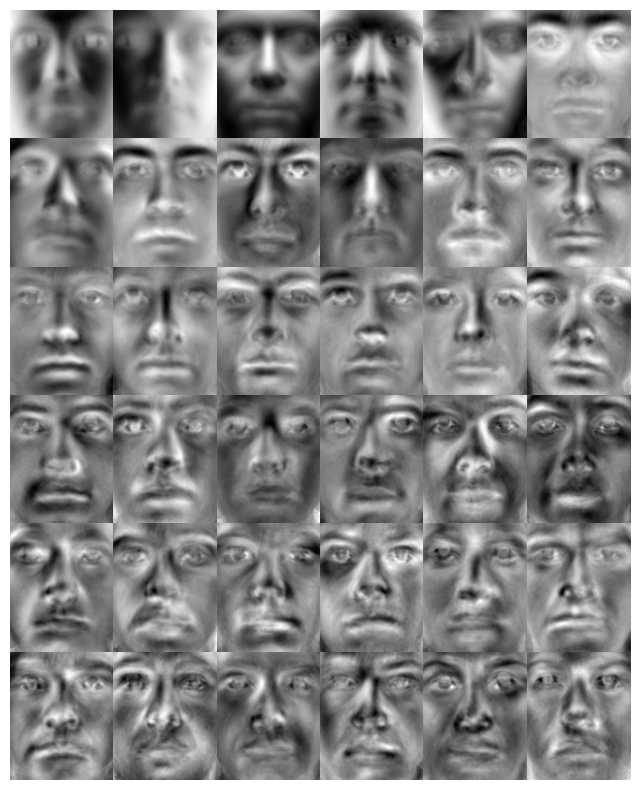

In [17]:
# Plot the first 36 eigenfaces
num_eigenfaces_to_plot = 36
plt.figure(figsize=(8, 10))
for i in range(num_eigenfaces_to_plot):
    plt.subplot(6, 6, i + 1)
    eigenface = np.reshape(U[:, i], (m, n)).T
    plt.imshow(eigenface, cmap='gray', aspect='auto')  # Set aspect to 'auto'
    plt.axis('off')

plt.subplots_adjust(wspace=0, hspace=0)
plt.show()

1.   **d) plot the 36 eigenfaces starting from the column 700.**

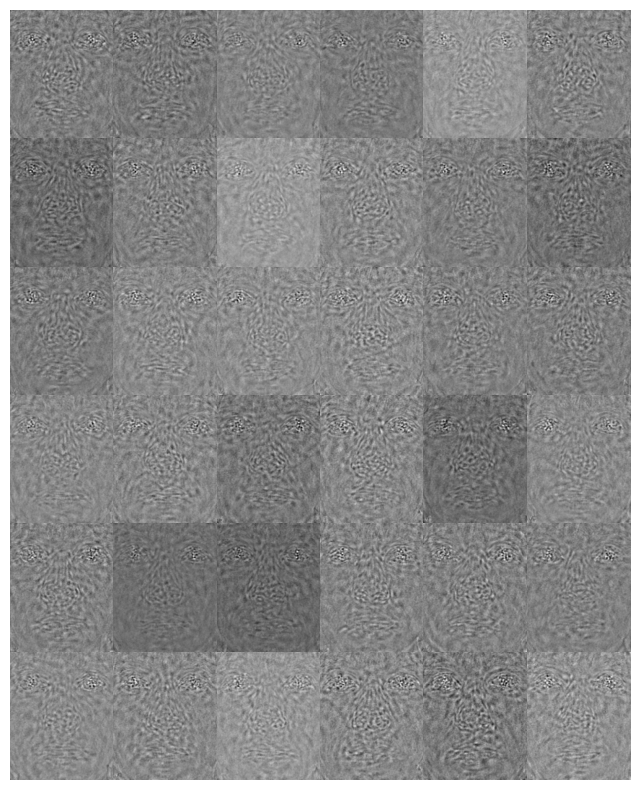

In [19]:
# Plot the 36 eigenfaces starting from column 700
start_column = 700
num_eigenfaces_to_plot = 36
plt.figure(figsize=(8, 10))
for i in range(num_eigenfaces_to_plot):
    plt.subplot(6, 6, i + 1)
    eigenface = np.reshape(U[:, start_column + i], (m, n)).T
    plt.imshow(eigenface, cmap='gray', aspect='auto')
    plt.axis('off')

plt.subplots_adjust(wspace=0, hspace=0)
plt.show()

1.   **e) plot the last 36 eigenfaces.**



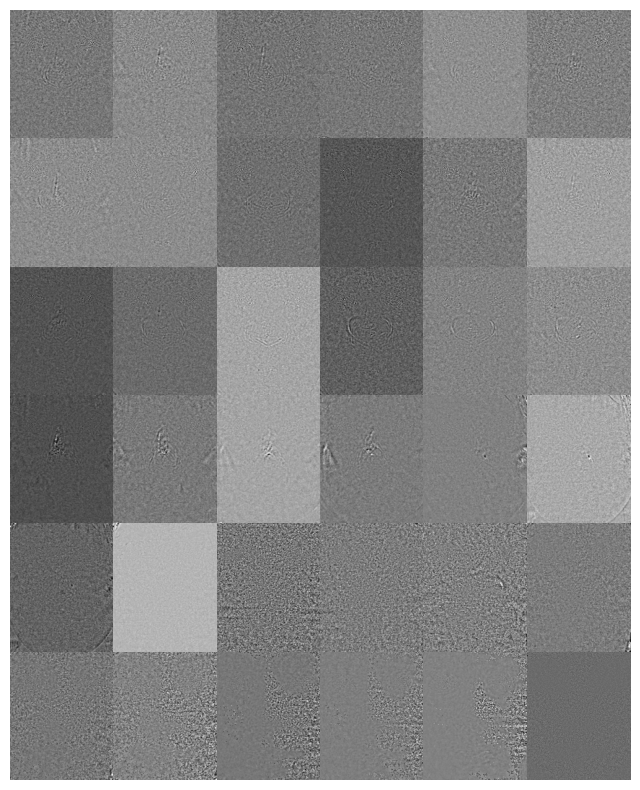

In [21]:
# Plot the last 36 eigenfaces
num_eigenfaces_to_plot = 36
plt.figure(figsize=(8, 10))
for i in range(num_eigenfaces_to_plot):
    plt.subplot(6, 6, i + 1)
    eigenface = np.reshape(U[:, -num_eigenfaces_to_plot + i], (m, n)).T
    plt.imshow(eigenface, cmap='gray', aspect='auto')
    plt.axis('off')

plt.subplots_adjust(wspace=0, hspace=0)
plt.show()

1.   **f) Compare the results from the c-e and discuss your findings.**

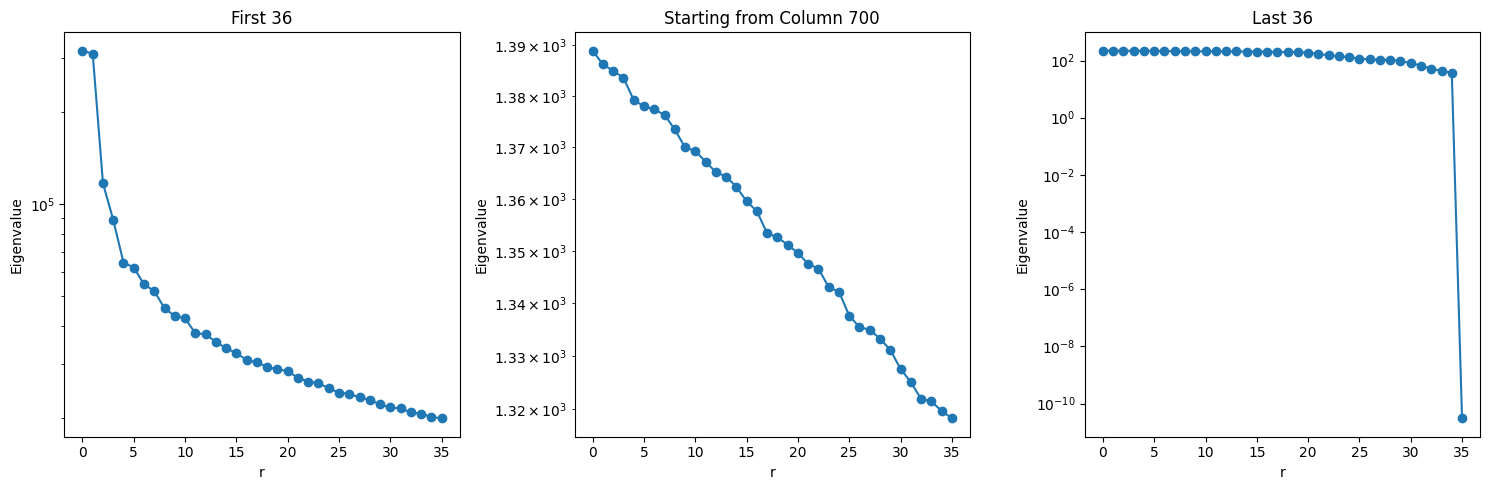

In [23]:
plt.figure(figsize=(15, 5))

# Plot for the first 36 eigenfaces
plt.subplot(1, 3, 1)
plt.semilogy(S[:36], marker='o')
plt.title('First 36')
plt.xlabel('r')
plt.ylabel('Eigenvalue')

# Plot for eigenfaces starting from column 700
plt.subplot(1, 3, 2)
plt.semilogy(S[700:700+36], marker='o')
plt.title('Starting from Column 700')
plt.xlabel('r')
plt.ylabel('Eigenvalue')

# Plot for the last 36 eigenfaces
plt.subplot(1, 3, 3)
plt.semilogy(S[-36:], marker='o')
plt.title('Last 36')
plt.xlabel('r')
plt.ylabel('Eigenvalue')

plt.tight_layout()
plt.show()

**Finding**

#####Higher eigenvalues imply a greater contribution to the total variability of the data. A sharp reduction in eigenvalues may indicate that the eigenfaces are capturing less meaningful information.
1.   **First 36 Eigenfaces:** Magnitude of eigenvalues are close to $10^6$. These capture general features found on the majority of the faces in the sample clearly (Eyes, nose, lips, eyebrow, almost everything). The rapid decrease in eigenvalues suggests that the first few eigenfaces account for the majority of the variation in the data.
2.   **36 Eigenfaces Starting from Column 700:** Mid range magnitude of eigenvalues around $10^3$ implies that these eigenfaces capture different aspects of the data (Eyes, nose, lips, no eyebrow, blurry).
1.   **Last 36 Eigenfaces:** A sharp drop around $10^0$ indicates decreasing significance in terms of data variability and also less variance compared to the other sets (no eyes, nose, lips, eyebrow).



